In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from enum import Enum, auto
from glob import glob
import os

In [2]:
def loadData(fp):
    df = pd.read_csv(fp)
    df["Ad Cart Type"] = df["Ad Cart Type"].str.rsplit(".").str[-1]
    df["Time"] = pd.to_datetime(df["Time"], format="ISO8601")
    return df

In [3]:
def loadDatas(folder):
    dataFps = glob(os.path.join(folder, "**", "*.csv"), recursive=True)
    dfs = []
    for dataFp in dataFps:
        df = loadData(dataFp)
        dfs.append(df)
    # Calculate median delta time
    data = pd.concat(dfs)
    data["Delta Time"] = df["Time"].diff().fillna(pd.Timedelta(0))
    print(f"Median Ad Cart Interval: {data["Delta Time"].apply(lambda x: x.total_seconds()).median():.3f}s")
    return data

In [4]:
data = loadDatas(r"Data")

Median Ad Cart Interval: 303.806s


In [5]:
data

,Time,Ad Cart Type,Match Value,Delta Time
0,2024-03-12 08:21:33.080428,COMPANION_TICKET,0.745945,0 days 00:00:00
1,2024-03-12 08:26:36.885958,DIAMONDS,0.628899,0 days 00:05:03.934071
2,2024-03-12 08:31:40.922819,DIAMONDS,0.608293,0 days 00:05:03.592228
3,2024-03-12 08:36:44.438865,DIAMONDS,0.647806,0 days 00:05:04.036191
4,2024-03-12 08:41:48.879891,CANNON_TICKET,0.601492,0 days 00:05:03.174438
...,...,...,...,...
38,2024-03-13 22:47:45.509286,FISH_TANK_KIT,0.659929,0 days 00:05:03.713655
39,2024-03-13 22:52:49.753675,FISH_TANK_KIT,0.717075,0 days 00:05:04.244389
40,2024-03-13 22:57:53.991791,SKILL_TICKET,0.663643,0 days 00:05:04.238116
41,2024-03-13 23:02:57.461006,FISH_TANK_KIT,0.659936,0 days 00:05:03.469215


In [6]:
def plotAdCartRewardDistribution(data):
    fig, ax = plt.subplots()
    valueCounts = data["Ad Cart Type"].value_counts()
    valueCountsNorm = data["Ad Cart Type"].value_counts(normalize=True).round(4)*100
    total = len(data)
    p = ax.bar(valueCountsNorm.index, valueCountsNorm.values)
    labels = [f"{valueCount}\n({valueRate:.2f}%)" for valueCount, valueRate in zip(valueCounts.values, valueCountsNorm.values)]
    ax.bar_label(p, label_type='edge', labels=labels)
    ax.tick_params(axis="x", labelrotation=45)
    ax.set_ylabel("Drop Rate (%)")
    ax.set_xlabel("Drop Type")
    ax.set_ylim(0,100)

    fig.suptitle(f"Catheros Ad Card Rewards Distribution\n(Total Samples:{total})")

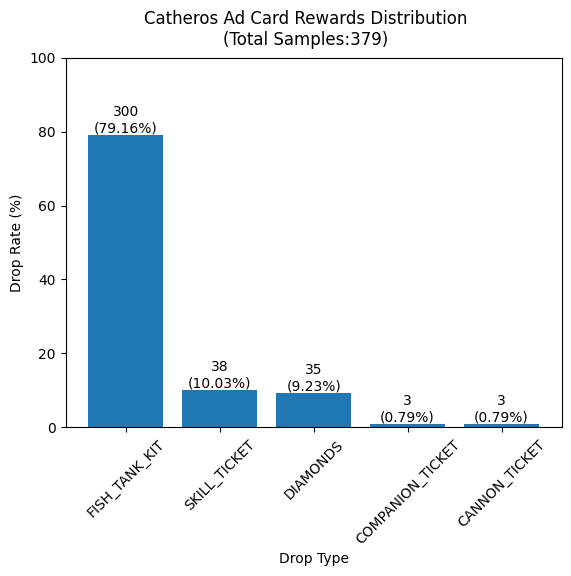

In [7]:
plotAdCartRewardDistribution(data)